In [1]:
import pandas as pd
from google.colab import drive 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

drive.mount('/content/gdrive')

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')



Mounted at /content/gdrive
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/NLP/Week13/week13_train.csv')
# df = pd.read_csv("./airline_review_training_data.csv")
print("Shape:",df.shape)
train_data=df[['document','label']]
train_data.head()

Shape: (45000, 3)


,document,label
0,Stephen Sondheim's SWEENEY TODD: THE DEMON BAR...,positive
1,The only good thing about this movie is that I...,negative
2,I'm afraid this one is pretty dreadful despite...,negative
3,The acting was terrible the cheesy fake CHEAP ...,negative
4,The DVD was a joke the audio for the first few...,negative


# Cleaning the data set

In [3]:
# Cleaning Training Data set
lem = WordNetLemmatizer()

import re
train_data_clean = (
    # start with training data
    train_data

    # not necessary for hugging face
    # .assign(clean_document= lambda x:[text.lower() for text in x.document])

     .assign(clean_document= lambda x: [re.sub(r"<br/>","",doc) for doc in x.document])
    #Remove “n\”
    .assign(clean_document= lambda x: [re.sub(r"\n","",doc) for doc in x.clean_document] )
    #Remove mentions i.e. any alphanumeric starting with “@”
    .assign(clean_document= lambda x: [re.sub("/*","",text) for text in x.clean_document])
    # remove punctuation
    .assign(clean_document= lambda x: [re.sub("[^\w\s]","",text) for text in x.clean_document])
    # tokenize
    # ############# Not necessary for pre trained model ##############
    # .assign(word_token= lambda x: [nltk.word_tokenize(text) for text in x.clean_document] )
    # # remove stop words
    # .assign(word_token= lambda x: [list(set(list_of_words).difference(stop_words)) for list_of_words in x.word_token])
    # Lemmatising the words
    # .assign(word_token= lambda x: [[lem.lemmatize(a_word) for a_word in list_of_words] for list_of_words in x.word_token ])
    # 
    # .assign(document_to_sklearn= lambda x: [" ".join(map(str,list_of_words)) for list_of_words in x.word_token ])  
)

train_data_clean.head(20)

,document,label,clean_document
0,Stephen Sondheim's SWEENEY TODD: THE DEMON BAR...,positive,Stephen Sondheims SWEENEY TODD THE DEMON BARBE...
1,The only good thing about this movie is that I...,negative,The only good thing about this movie is that I...
2,I'm afraid this one is pretty dreadful despite...,negative,Im afraid this one is pretty dreadful despite ...
3,The acting was terrible the cheesy fake CHEAP ...,negative,The acting was terrible the cheesy fake CHEAP ...
4,The DVD was a joke the audio for the first few...,negative,The DVD was a joke the audio for the first few...
5,I gave Soul Plane the benefit of the doubt and...,negative,I gave Soul Plane the benefit of the doubt and...
6,A powerfully wonderful movie.. You are held in...,positive,A powerfully wonderful movie You are held in a...
7,Pretty disappointing prequel to the first two ...,negative,Pretty disappointing prequel to the first two ...
8,The funniest show ever on TV albeit the humor ...,positive,The funniest show ever on TV albeit the humor ...
9,Surprisingly enough does movie does have some ...,negative,Surprisingly enough does movie does have some ...


# Exploratory Data Analysis

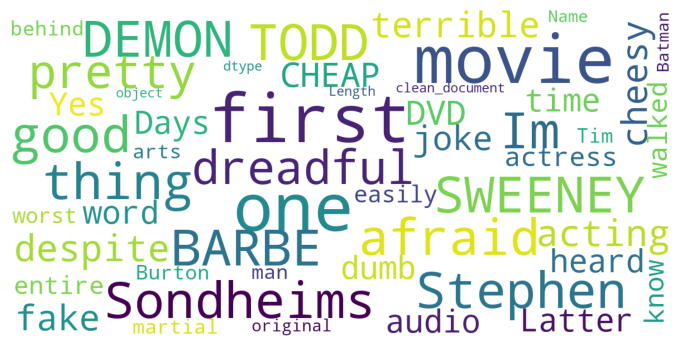

In [4]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=7000,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(train_data_clean['clean_document'])

# Feature Engineering


In [5]:
train_data_clean['label'] = train_data_clean['label'].apply(lambda x: 1 if x == "positive" else "0")
train_data_clean.head()

,document,label,clean_document
0,Stephen Sondheim's SWEENEY TODD: THE DEMON BAR...,1,Stephen Sondheims SWEENEY TODD THE DEMON BARBE...
1,The only good thing about this movie is that I...,0,The only good thing about this movie is that I...
2,I'm afraid this one is pretty dreadful despite...,0,Im afraid this one is pretty dreadful despite ...
3,The acting was terrible the cheesy fake CHEAP ...,0,The acting was terrible the cheesy fake CHEAP ...
4,The DVD was a joke the audio for the first few...,0,The DVD was a joke the audio for the first few...


In [8]:
# Prediction and Classification Report in Training Data
from sklearn.metrics import accuracy_score, classification_report
# Classification metrics
def generate_classrpt(Y_test, y_pred,algo=''):
    print('======================================================')
    if algo!= "":
        print(" Clasification report for {algo}".format(algo=algo))
    classification_report_= classification_report(Y_test, y_pred)
    print('\n Accuracy: ', accuracy_score(Y_test, y_pred))
    print('\nClassification Report')
    print('======================================================')
    print('\n', classification_report_)
    return True

# Sentiment Analysis with Hugging face

In [ ]:
!pip install transformers
from transformers import pipeline

In [10]:

classifier = pipeline("sentiment-analysis")
train_data_clean = (
    train_data_clean
    #  classification using hugging face
    .assign(hugn_face = lambda x: x['clean_document'].apply(lambda s: classifier(s)))
# get the label and scroe from hugging face into different columns
    .assign(
         hgn_label = lambda x: x['hugn_face'].apply(lambda s: (s[0]['label'])),
         hgn_score = lambda x: x['hugn_face'].apply(lambda s: (s[0]['score']))
    )
    # if sentiment is negative mark as 0 other wise 1
    .assign(cln_hgn_sentiment = lambda x:x['hgn_label'].apply(lambda x:0 if x=='NEGATIVE'  else 1))
)


train_data_clean

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
Token indices sequence length is longer than the specified maximum sequence length for this model (699 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: ignored

# Sentiment Analysis with Vader

In [11]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


     |████████████████████████████████| 125 kB 7.7 MB/s 


In [13]:
train_data_clean['vader_sntmnt'] = train_data_clean['clean_document'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['compound'])
train_data_clean['cln_vader_sntmnt'] =train_data_clean['vader_sntmnt'].apply(lambda x:0 if x<0  else 1)
# generate_classrpt(train_data_clean['label'],train_data_clean['cln_vader_sntmnt'] ,algo='Vader')
train_data_clean

,document,label,clean_document,vader_sntmnt,cln_vader_sntmnt
0,Stephen Sondheim's SWEENEY TODD: THE DEMON BAR...,1,Stephen Sondheims SWEENEY TODD THE DEMON BARBE...,0.9874,1
1,The only good thing about this movie is that I...,0,The only good thing about this movie is that I...,-0.9464,0
2,I'm afraid this one is pretty dreadful despite...,0,Im afraid this one is pretty dreadful despite ...,-0.8121,0
3,The acting was terrible the cheesy fake CHEAP ...,0,The acting was terrible the cheesy fake CHEAP ...,-0.7137,0
4,The DVD was a joke the audio for the first few...,0,The DVD was a joke the audio for the first few...,-0.3887,0
...,...,...,...,...,...
44995,The very first time I heard of Latter Days was...,1,The very first time I heard of Latter Days was...,0.8143,1
44996,Yes dumb is the word for this actress.. I know...,0,Yes dumb is the word for this actress I know m...,0.6215,1
44997,I have walked out of about 6 movies my entire ...,0,I have walked out of about 6 movies my entire ...,-0.8146,0
44998,This is easily one of the worst martial arts f...,0,This is easily one of the worst martial arts f...,-0.9950,0


In [20]:

real_label=train_data_clean['label'].astype('int')


In [19]:
generate_classrpt(real_label,train_data_clean['cln_vader_sntmnt'] ,algo='Vader')

 Clasification report for Vader

 Accuracy:  0.6962888888888888

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.53      0.64     22500
           1       0.65      0.86      0.74     22500

    accuracy                           0.70     45000
   macro avg       0.72      0.70      0.69     45000
weighted avg       0.72      0.70      0.69     45000



True